<a href="https://colab.research.google.com/github/NitNay/NitNay/blob/main/bank_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
dataset = pd.read_csv('BankCreditCard.csv')

In [5]:
# Analyze the dataset
dataset.head()

Customer ID  Credit_Amount  Gender  Academic_Qualification  Marital  \
0            1        20000.0       2                       2        1   
1            2       220000.0       2                       2        2   
2            3        90000.0       2                       2        2   
3            4        50000.0       2                       2        1   
4            5        50000.0       1                       2        1   

   Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
0         24                     2                     2   
1         26                     0                     2   
2         34                     0                     0   
3         37                     0                     0   
4         57                     0                     0   

   Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
0                       0                       0  ...                0.0   
1                       0                       0  ...             3272.0   
2                       0                       0  ...            24332.0   
3                       0                       0  ...            29324.0   
4                       0                       0  ...            20940.0   

   May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
0              0.0               0.0                   0.0   
1           3455.0            3261.0                   0.0   
2          14848.0           15548.0                1619.0   
3          28858.0           28547.0                3000.0   
4          18146.0           18131.0                3000.0   

   Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
0                 679.0                     0.0                     0.0   
1                2000.0                  1000.0                  1000.0   
2                2500.0                  1000.0                  1000.0   
3                2029.0                  1200.0                  1100.0   
4               36672.0                 10000.0                  9000.0   

   Previous_Payment_May  Previous_Payment_June  Default_Payment  
0                   0.0                    0.0                1  
1                   0.0                 2000.0                1  
2                1000.0                 5000.0                0  
3                1069.0                 1000.0                0  
4                 689.0                  679.0                0  

[5 rows x 25 columns]

In [6]:
# Data Description  Exploratory Data Analysis (EDA)
dataset.describe()

Customer ID  Credit_Amount        Gender  Academic_Qualification  \
count  30000.000000   3.000000e+04  30000.000000            30000.000000   
mean   15000.500000   1.929173e+05      1.603733                1.855933   
std     8660.398374   1.322888e+05      0.489129                0.794397   
min        1.000000   2.000000e+04      1.000000                1.000000   
25%     7500.750000   5.000000e+04      1.000000                1.000000   
50%    15000.500000   2.200000e+05      2.000000                2.000000   
75%    22500.250000   2.700000e+05      2.000000                2.000000   
max    30000.000000   2.000000e+06      2.000000                6.000000   

            Marital     Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
count  30000.000000  30000.000000          30000.000000          30000.000000   
mean       1.551867     35.485500              0.355200              0.319300   
std        0.521970      9.217904              0.746984              0.796012   
min        0.000000     21.000000              0.000000              0.000000   
25%        1.000000     28.000000              0.000000              0.000000   
50%        2.000000     34.000000              0.000000              0.000000   
75%        2.000000     41.000000              0.000000              0.000000   
max        3.000000     79.000000              6.000000              6.000000   

       Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
count            30000.000000             30000.00000  ...       30000.000000   
mean                 0.302967                 0.25670  ...       55122.263933   
std                  0.781792                 0.74388  ...       83577.329356   
min                  0.000000                 0.00000  ...     -270000.000000   
25%                  0.000000                 0.00000  ...        2671.500000   
50%                  0.000000                 0.00000  ...       25629.000000   
75%                  0.000000                 0.00000  ...       54508.500000   
max                  6.000000                 6.00000  ...      992596.000000   

       May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
count     30000.000000      30000.000000          30000.000000   
mean      39939.618800      38506.051533           6285.653867   
std       60373.934792      59104.280171          18944.920299   
min      -81334.000000    -338603.000000              0.000000   
25%        1763.000000       1256.000000           1000.000000   
50%       18043.000000      17071.000000           3000.000000   
75%       50190.500000      48655.250000           6000.000000   
max      827171.000000     861664.000000         973663.000000   

       Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
count          3.000000e+04            30000.000000            30000.000000   
mean           7.466544e+03             5836.140567             5127.687433   
std            3.467950e+04            20696.306703            17103.762740   
min            0.000000e+00                0.000000                0.000000   
25%            7.700000e+02              550.000000              333.000000   
50%            2.542000e+03             1900.000000             1500.000000   
75%            5.000000e+03             5500.000000             4013.250000   
max            2.674259e+06           999055.000000           538897.000000   

       Previous_Payment_May  Previous_Payment_June  Default_Payment  
count           30000.00000           30000.000000     30000.000000  
mean             5261.19120            5215.502567         0.221200  
std             16989.50685           17777.465775         0.415062  
min                 0.00000               0.000000         0.000000  
25%               310.00000             117.750000         0.000000  
50%              1539.00000            1500.000000         0.000000  
75%              5000.00000            4000.000000         0.00000

In [8]:
# Exploratory Data Analysis (EDA)
dataset.isnull().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [ ]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[2.0000e+04 2.0000e+00 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.2000e+05 2.0000e+00 2.0000e+00 ... 1.0000e+03 0.0000e+00 2.0000e+03]
 [9.0000e+04 2.0000e+00 2.0000e+00 ... 1.0000e+03 1.0000e+03 5.0000e+03]
 ...
 [3.0000e+04 1.0000e+00 2.0000e+00 ... 4.3000e+03 3.0000e+03 3.1000e+03]
 [8.0000e+04 1.0000e+00 3.0000e+00 ... 1.9350e+03 5.3965e+04 1.8040e+03]
 [5.0000e+04 1.0000e+00 2.0000e+00 ... 1.0000e+03 1.0000e+03 1.0000e+03]]


In [ ]:
print(y)

[1 1 0 ... 1 1 1]


In [ ]:
# Data Preparation ALL IN ONE
# Analyze the dataset
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   Customer ID  Credit_Amount  Gender  Academic_Qualification  Marital  \
0            1        20000.0       2                       2        1   
1            2       220000.0       2                       2        2   
2            3        90000.0       2                       2        2   
3            4        50000.0       2                       2        1   
4            5        50000.0       1                       2        1   

   Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
0         24                     2                     2   
1         26                     0                     2   
2         34                     0                     0   
3         37                     0                     0   
4         57                     0                     0   

   Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
0                       0                       0  ...                0.0   
1                       0               

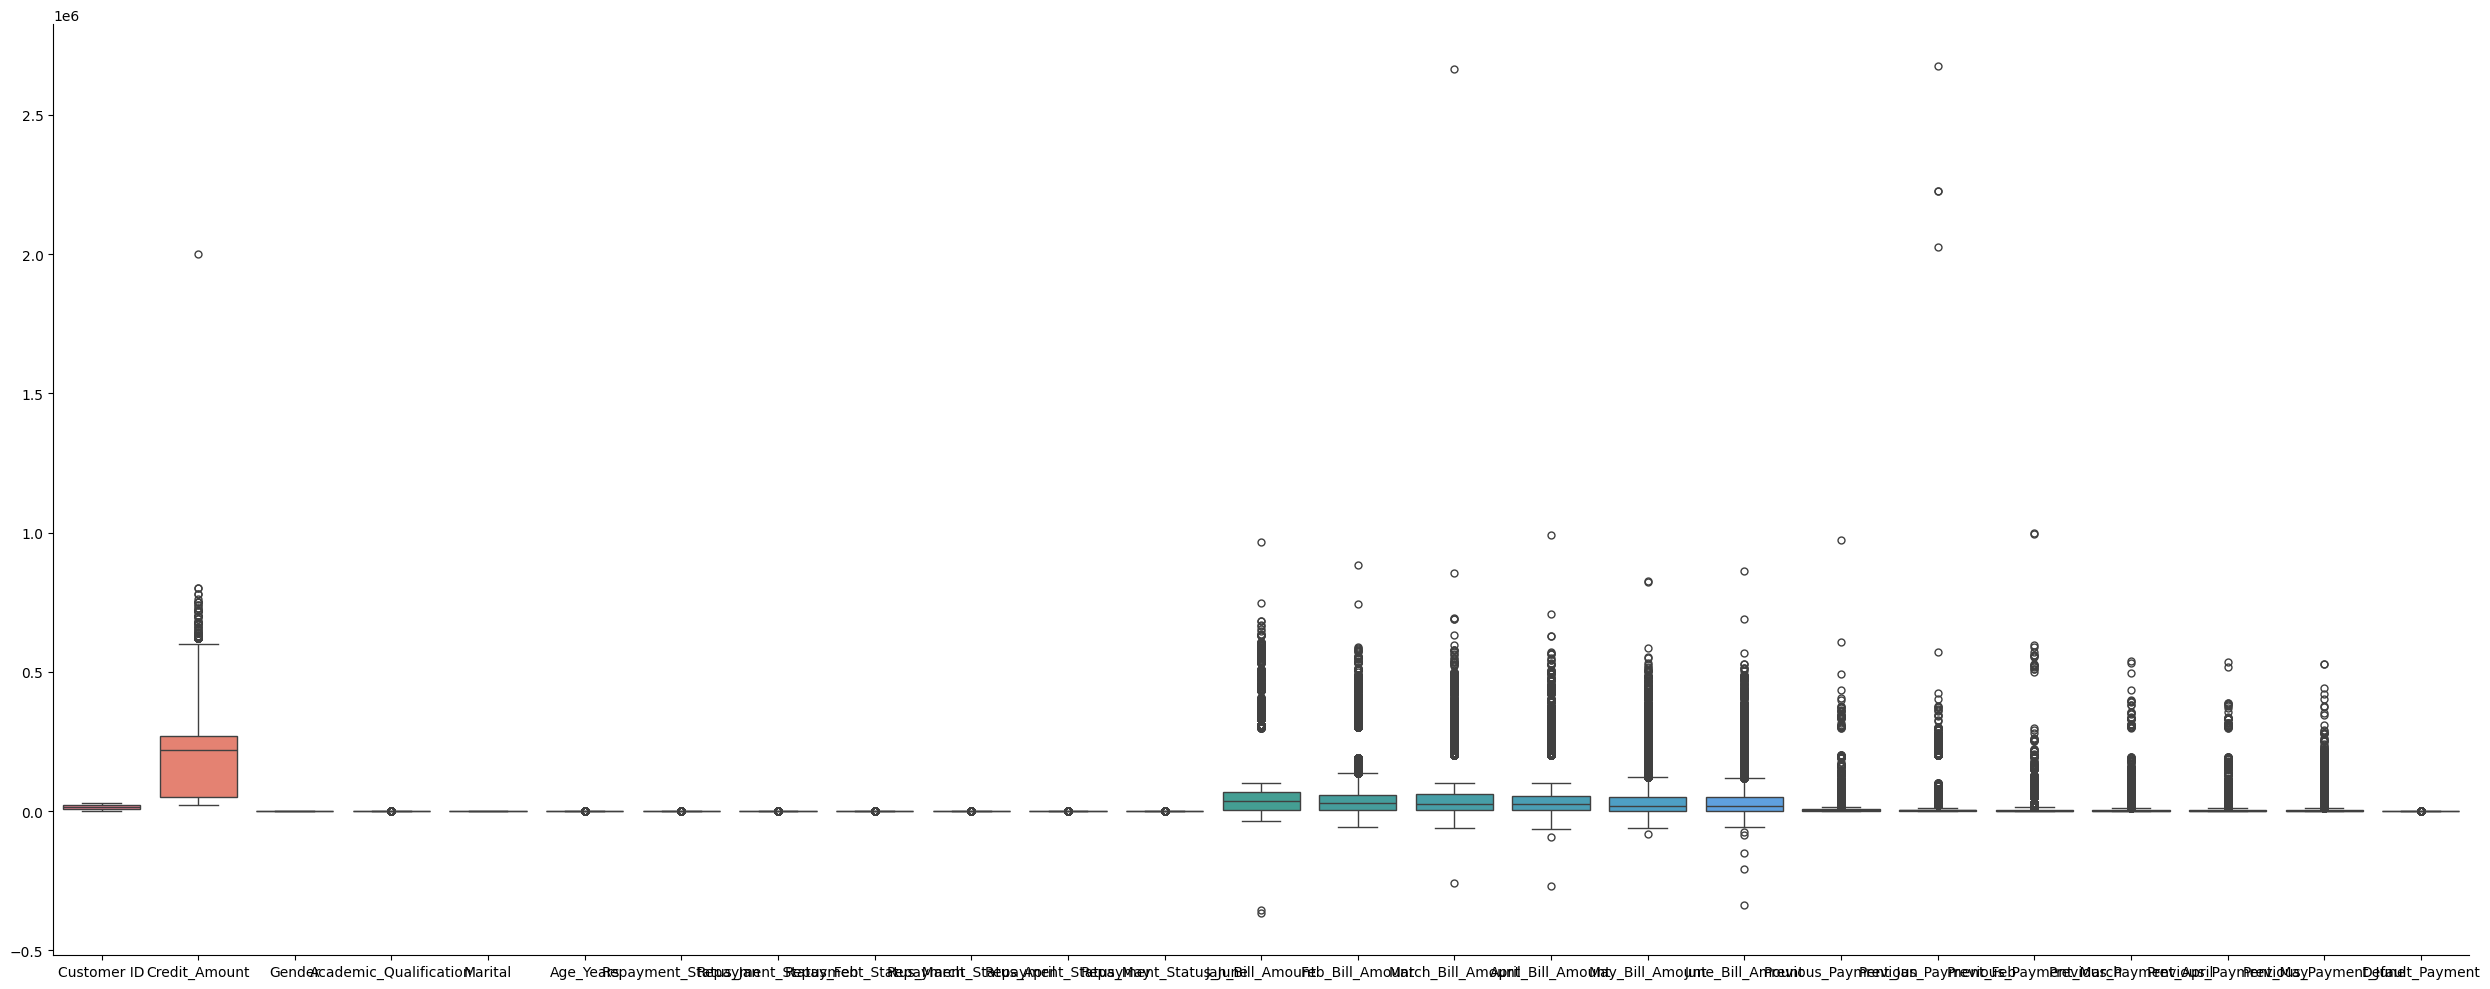

In [11]:
# Data Visuliazation
sns.catplot(data=dataset, kind='box', height=10,aspect=2.5)

In [14]:
# Outlier in Credit Amount and Monthly Bill Amount
Q1 = dataset.Credit_Amount.quantile(0.25)
Q3 = dataset.Credit_Amount.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


220000.0


In [15]:
dataset=dataset[ (dataset.Credit_Amount> (Q1-1.5*IQR) ) & (dataset.Credit_Amount<(Q3 +1.5*IQR) ) ]

In [16]:
Q17 = dataset.Age_Years.quantile(0.25)
Q37 = dataset.Age_Years.quantile(0.75)
IQR1 = Q37 - Q17
print(IQR1)

13.0


In [17]:
dataset=dataset[ (dataset.Age_Years> (Q17-1.5*IQR1) ) & (dataset.Age_Years<(Q37 +1.5*IQR1) ) ]

In [18]:
Q11 = dataset.Jan_Bill_Amount.quantile(0.25)
Q31 = dataset.Jan_Bill_Amount.quantile(0.75)
IQR2 = Q31 - Q11
print(IQR2)

62755.25


In [19]:
dataset=dataset[ (dataset.Jan_Bill_Amount> (Q11-1.5*IQR2) ) & (dataset.Jan_Bill_Amount<(Q31 +1.5*IQR2) ) ]

In [20]:
Q12 = dataset.Feb_Bill_Amount.quantile(0.25)
Q32 = dataset.Feb_Bill_Amount.quantile(0.75)
IQR3 = Q32 - Q12
print(IQR3)

39362.75


In [21]:
dataset=dataset[ (dataset.Feb_Bill_Amount> (Q12-1.5*IQR3) ) & (dataset.Feb_Bill_Amount<(Q32 +1.5*IQR3) ) ]

In [22]:
Q13 = dataset.March_Bill_Amount.quantile(0.25)
Q33= dataset.March_Bill_Amount.quantile(0.75)
IQR4 = Q33 - Q13
print(IQR4)

34982.0


In [23]:
dataset=dataset[ (dataset.March_Bill_Amount> (Q13-1.5*IQR4) ) & (dataset.March_Bill_Amount<(Q33 +1.5*IQR4) ) ]

In [24]:
Q14 = dataset.April_Bill_Amount.quantile(0.25)
Q34 = dataset.April_Bill_Amount.quantile(0.75)
IQR5 = Q34 - Q14
print(IQR5)

27948.25


In [25]:
dataset=dataset[ (dataset.April_Bill_Amount> (Q14-1.5*IQR5) ) & (dataset.April_Bill_Amount<(Q34 +1.5*IQR5) ) ]

In [26]:
Q15 = dataset.May_Bill_Amount.quantile(0.25)
Q35 = dataset.May_Bill_Amount.quantile(0.75)
IQR6 = Q35 - Q15
print(IQR6)

25669.5


In [27]:
dataset=dataset[ (dataset.May_Bill_Amount> (Q15-1.5*IQR6) ) & (dataset.May_Bill_Amount<(Q35 +1.5*IQR6) ) ]

In [28]:
Q16 = dataset.June_Bill_Amount.quantile(0.25)
Q36 = dataset.June_Bill_Amount.quantile(0.75)
IQR7 = Q36 - Q16
print(IQR7)

23809.0


In [30]:
dataset=dataset[ (dataset.June_Bill_Amount> (Q16-1.5*IQR7) ) & (dataset.June_Bill_Amount<(Q36 +1.5*IQR7) ) ]

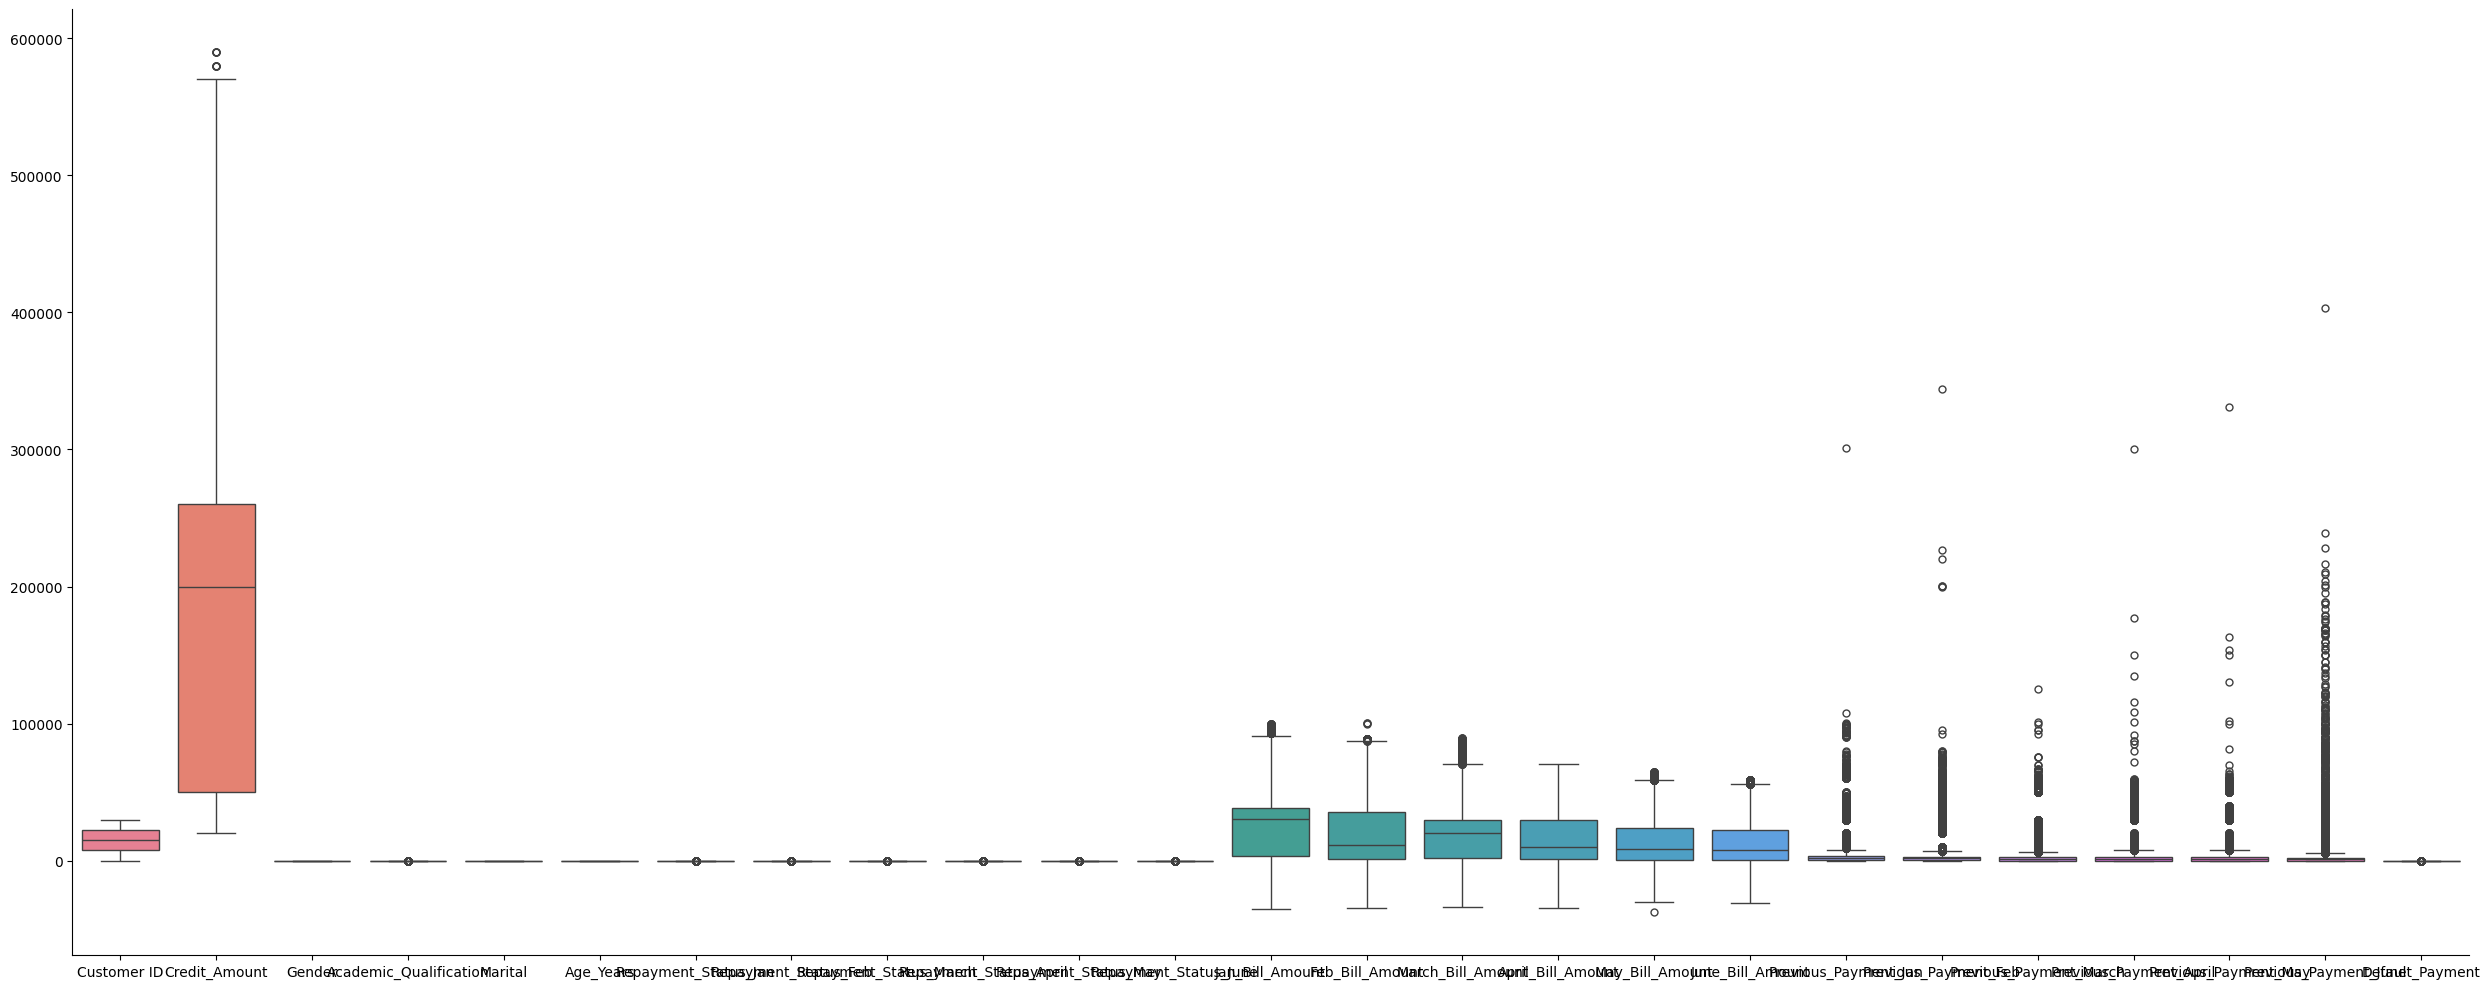

In [32]:
sns.catplot(data=dataset, kind='box',height=10,aspect=2.5)

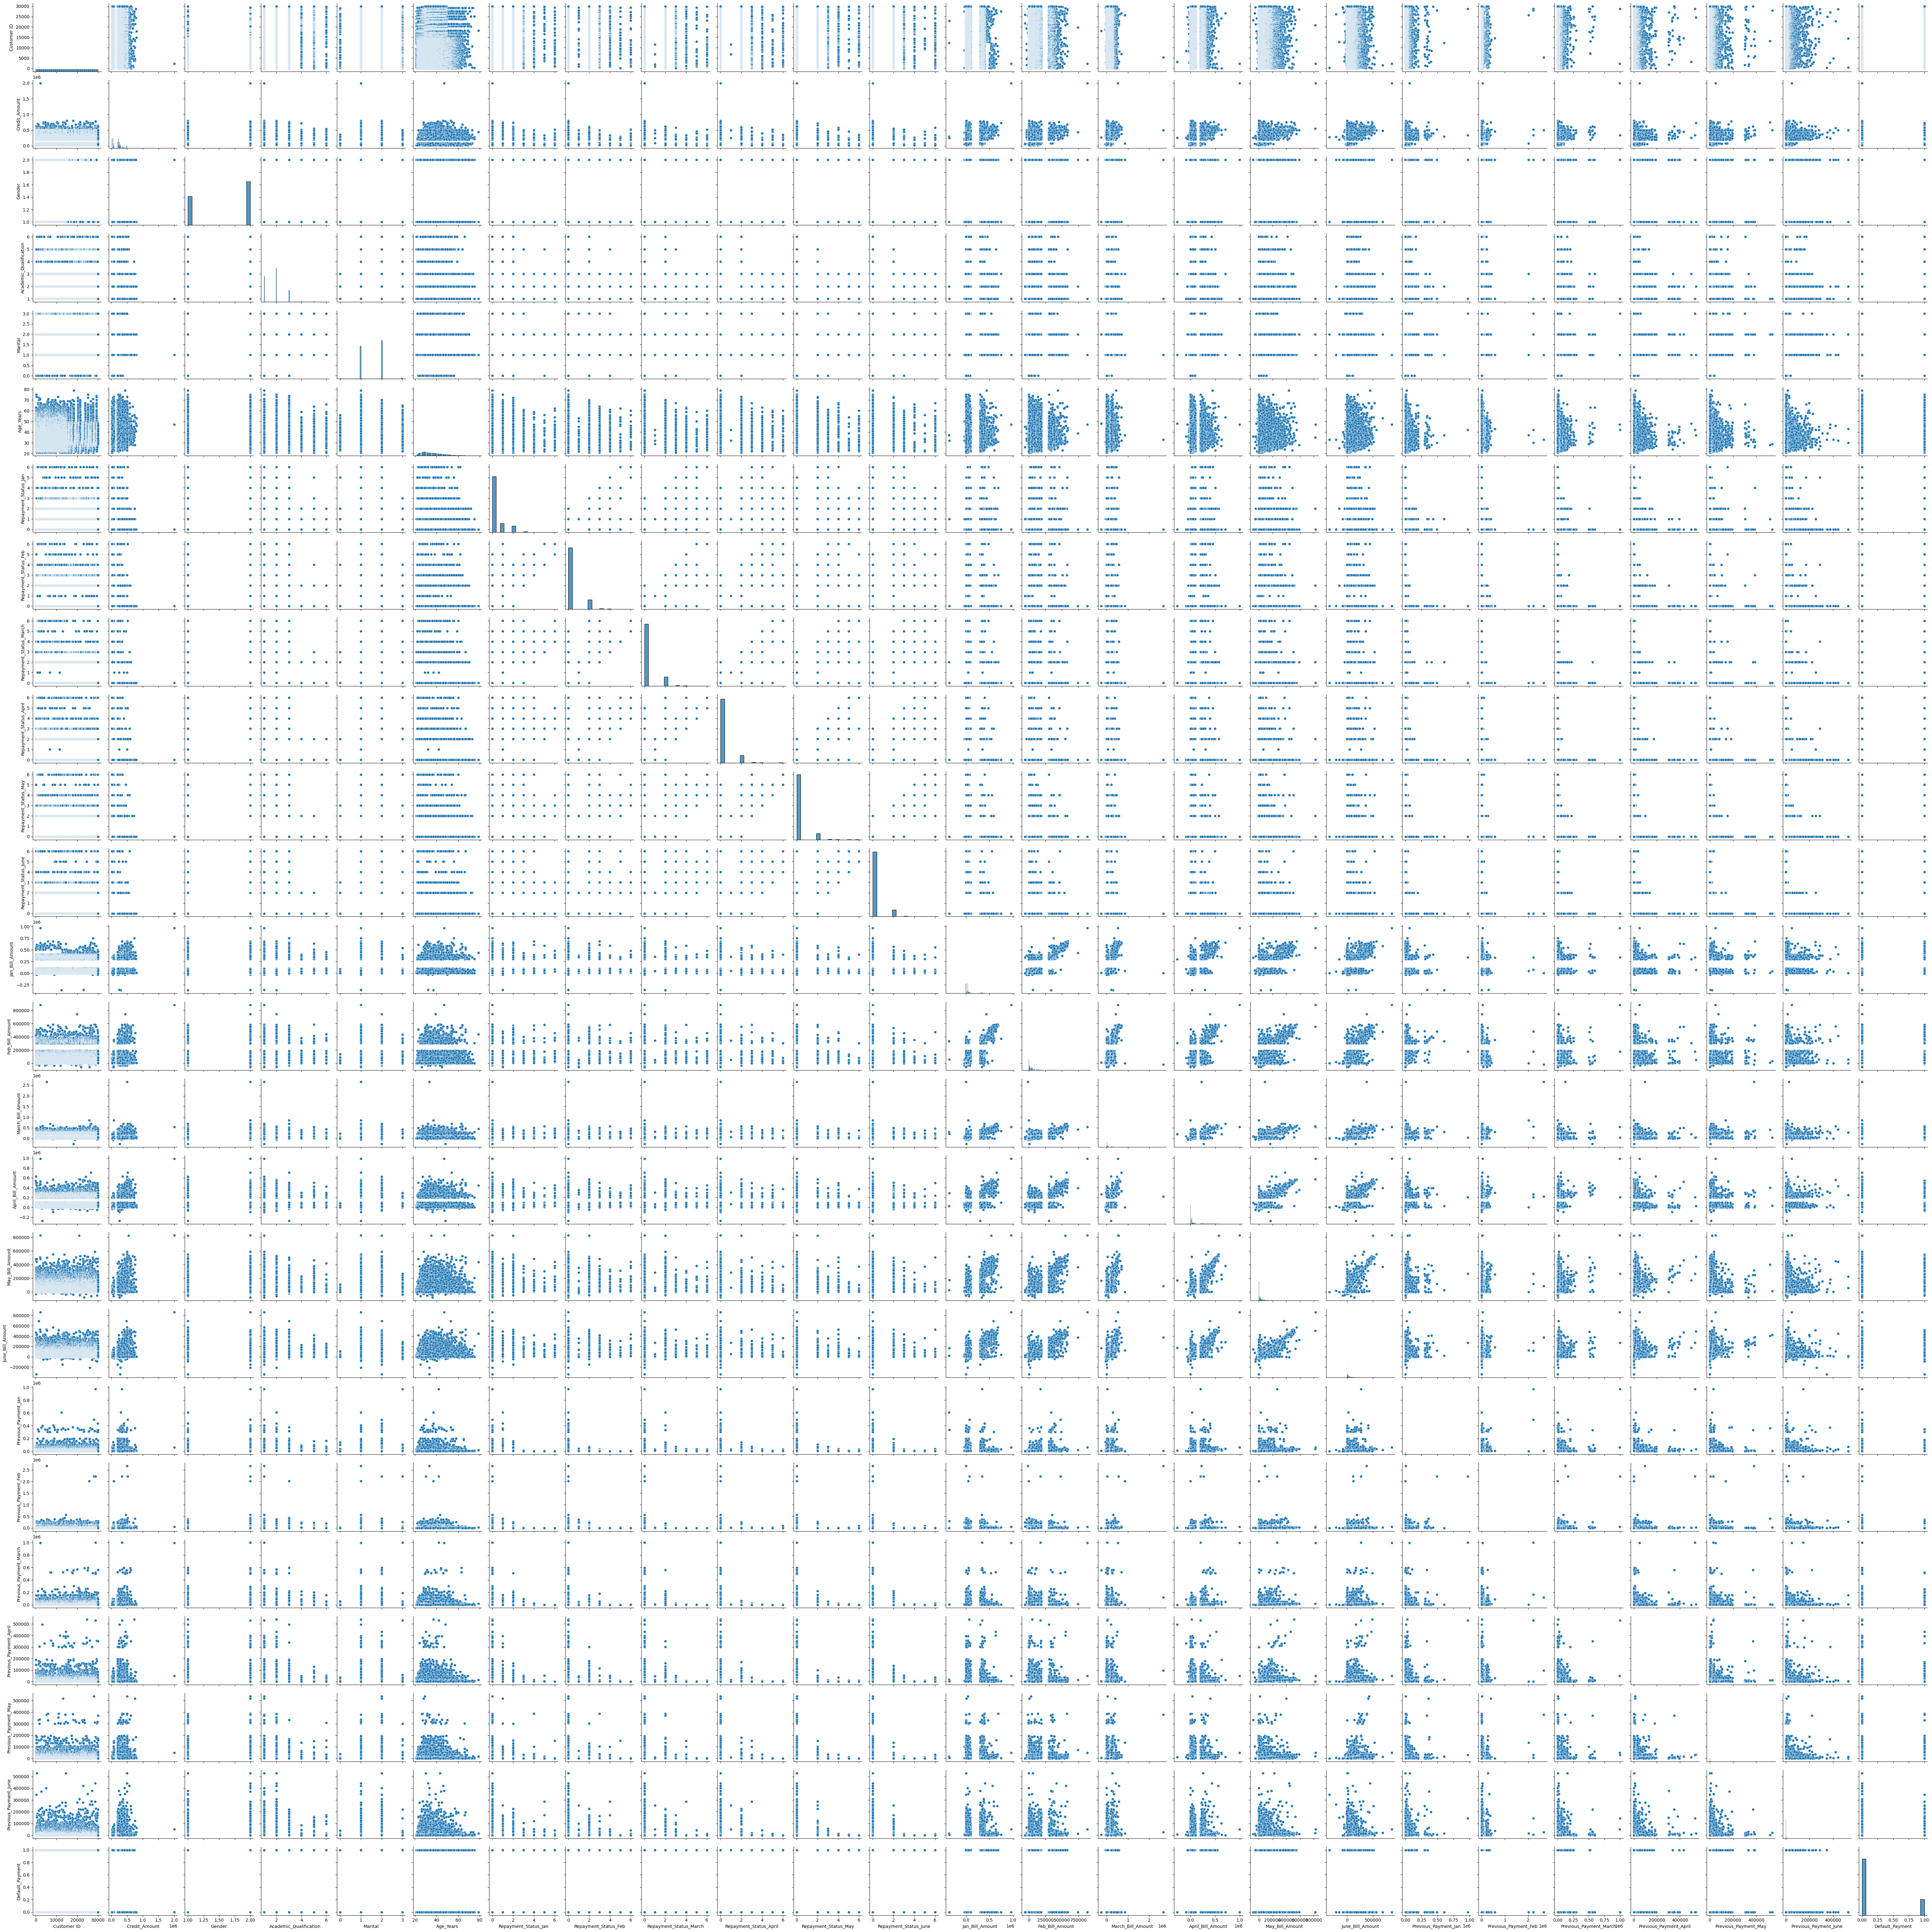

In [12]:
sns.pairplot(dataset)

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Credit_Amount'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Academic_Qualification'}>,
        <Axes: title={'center': 'Marital'}>],
       [<Axes: title={'center': 'Age_Years'}>,
        <Axes: title={'center': 'Repayment_Status_Jan'}>,
        <Axes: title={'center': 'Repayment_Status_Feb'}>,
        <Axes: title={'center': 'Repayment_Status_March'}>,
        <Axes: title={'center': 'Repayment_Status_April'}>],
       [<Axes: title={'center': 'Repayment_Status_May'}>,
        <Axes: title={'center': 'Repayment_Status_June'}>,
        <Axes: title={'center': 'Jan_Bill_Amount'}>,
        <Axes: title={'center': 'Feb_Bill_Amount'}>,
        <Axes: title={'center': 'March_Bill_Amount'}>],
       [<Axes: title={'center': 'April_Bill_Amount'}>,
        <Axes: title={'center': 'May_Bill_Amount'}>,
        <Axes: title={'center': 'June_Bill_Amount'}>,
        <Axes: title={'ce

<Figure size 2000x2000 with 0 Axes>

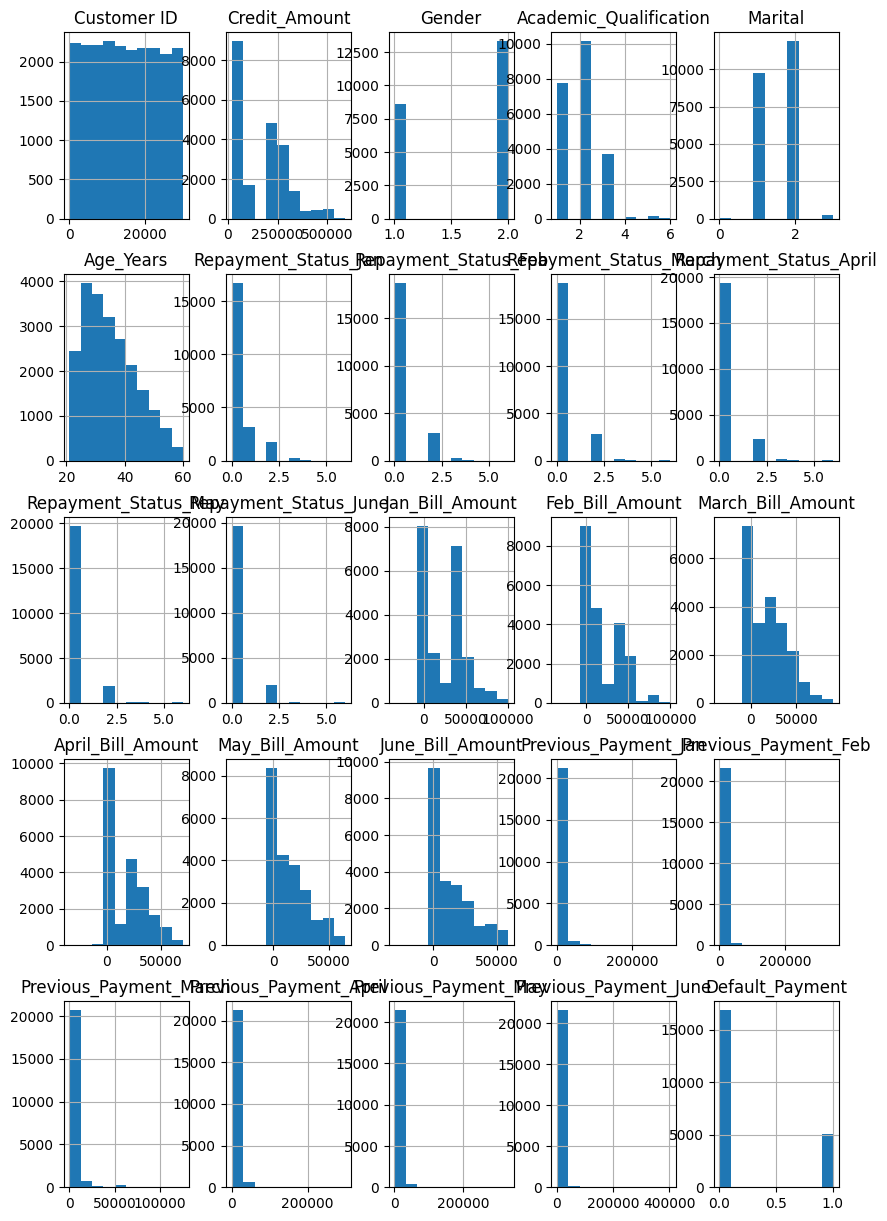

In [33]:
plt.figure(figsize=(20,20))
dataset.hist(figsize=(10,15))

In [34]:
dataset.corr()

Customer ID  Credit_Amount    Gender  \
Customer ID                1.000000       0.030339  0.023142   
Credit_Amount              0.030339       1.000000  0.078225   
Gender                     0.023142       0.078225  1.000000   
Academic_Qualification     0.037088      -0.257041 -0.001758   
Marital                   -0.036282      -0.110847 -0.045197   
Age_Years                  0.022084       0.127246 -0.075229   
Repayment_Status_Jan      -0.013635      -0.194371 -0.030121   
Repayment_Status_Feb      -0.003042      -0.231398 -0.042179   
Repayment_Status_March    -0.013666      -0.217345 -0.042115   
Repayment_Status_April     0.027542      -0.204279 -0.039280   
Repayment_Status_May      -0.008036      -0.196092 -0.035395   
Repayment_Status_June     -0.023297      -0.187667 -0.030024   
Jan_Bill_Amount           -0.017211      -0.270198 -0.051315   
Feb_Bill_Amount           -0.019552      -0.248699 -0.044109   
March_Bill_Amount         -0.004906      -0.254854 -0.042763   
April_Bill_Amount          0.027643      -0.239791 -0.034678   
May_Bill_Amount           -0.002215      -0.195280 -0.013555   
June_Bill_Amount           0.003968      -0.193299 -0.009328   
Previous_Payment_Jan      -0.003581       0.157081  0.003847   
Previous_Payment_Feb       0.001603       0.172642  0.012040   
Previous_Payment_March     0.051734       0.179676  0.020605   
Previous_Payment_April     0.012051       0.159421  0.022430   
Previous_Payment_May       0.003234       0.162304  0.013670   
Previous_Payment_June      0.005714       0.175498  0.007972   
Default_Payment           -0.011264      -0.161511 -0.034685   

                        Academic_Qualification   Marital  Age_Years  \
Customer ID                           0.037088 -0.036282   0.022084   
Credit_Amount                        -0.257041 -0.110847   0.127246   
Gender                               -0.001758 -0.045197  -0.075229   
Academic_Qualification                1.000000 -0.138639   0.183534   
Marital                              -0.138639  1.000000  -0.420070   
Age_Years                             0.183534 -0.420070   1.000000   
Repayment_Status_Jan                  0.060343 -0.002990  -0.008928   
Repayment_Status_Feb                  0.071918 -0.001677  -0.011633   
Repayment_Status_March                0.062085  0.009671  -0.014385   
Repayment_Status_April                0.056476  0.001128  -0.006689   
Repayment_Status_May                  0.048476  0.004943  -0.017074   
Repayment_Status_June                 0.037308  0.011482  -0.022062   
Jan_Bill_Amount                       0.130194  0.046875  -0.052344   
Feb_Bill_Amount                       0.119504  0.039455  -0.039309   
March_Bill_Amount                     0.116519  0.041445  -0.040308   
April_Bill_Amount                     0.106378  0.044020  -0.054133   
May_Bill_Amount                       0.079115  0.036350  -0.052579   
June_Bill_Amount                      0.077397  0.034373  -0.047370   
Previous_Payment_Jan                 -0.049521 -0.006314   0.022034   
Previous_Payment_Feb                 -0.049265 -0.014100   0.027424   
Previous_Payment_March               -0.051791 -0.017986   0.019989   
Previous_Payment_April               -0.059161 -0.014555   0.018440   
Previous_Payment_May                 -0.064799 -0.011287   0.013341   
Previous_Payment_June                -0.057390 -0.003110   0.005895   
Default_Payment                       0.034662 -0.018455   0.008733   

                        Repayment_Status_Jan  Repayment_Status_Feb  \
Customer ID                        -0.013635             -0.003042   
Credit_Amount                      -0.194371             -0.231398   
Gender                             -0.030121             -0.042179   
Academic_Qualification              0.060343              0.071918   
Marital                            -0.002990             -0.001677   
Age_Years                          -0.008928             -0.011633   
Repayment_Status_Jan  

<Axes: >

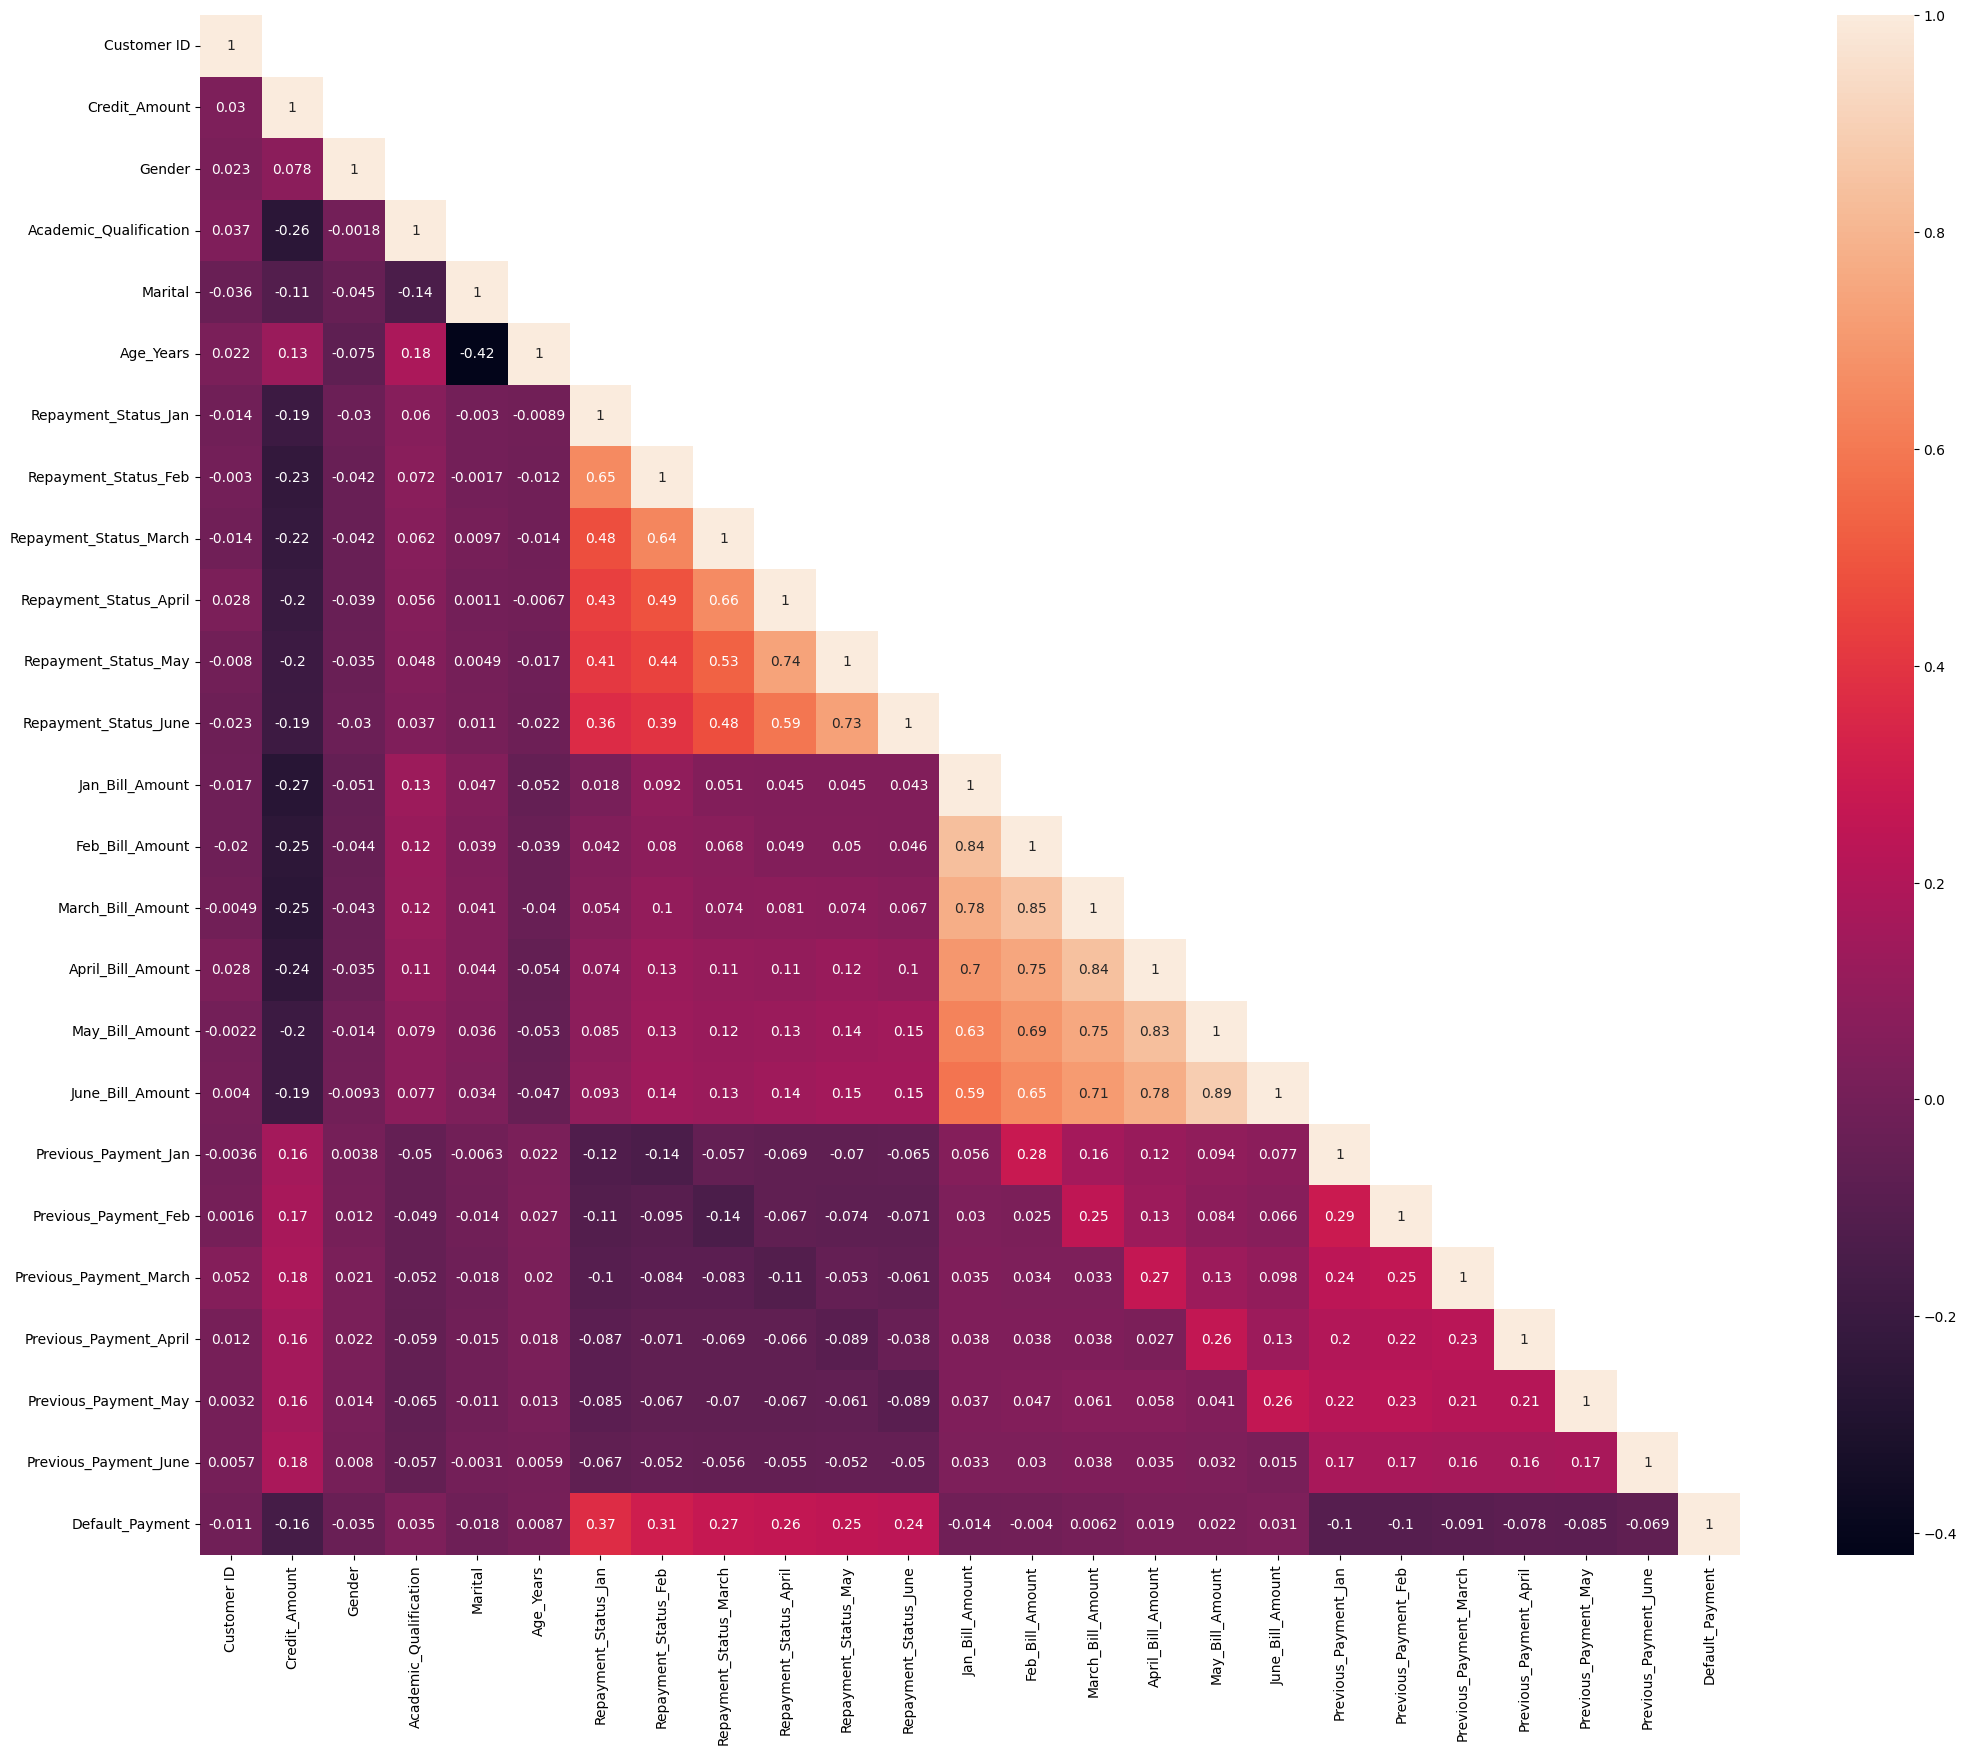

In [37]:
plt.figure(figsize=(25,20))
mask = np.array(dataset.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(dataset.corr(),annot=True,mask= mask,square= True,cbar=True)

Observation
Negative Correlation : Credit_Amount and Jan_Bill_Amount, Marital and Age_Years.

Positive Correlation : May_Bill_Amount and June_Bill_Amount, April_Bill_Amount and May_Bill_Amount,Feb_Bill_Amount and March_Bill_Amount.


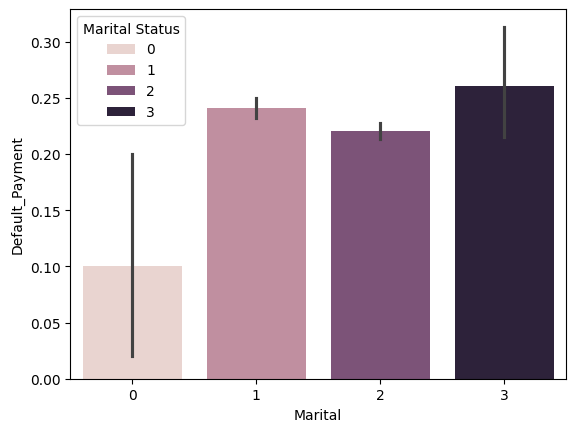

In [42]:

sns.barplot(x=dataset['Marital'], y=dataset['Default_Payment'], hue=dataset['Marital'])

# Adding a legend
plt.legend(title='Marital Status')

# Show the plot
plt.show()


In [43]:
# We need to drop the 0 category
dataset.drop(dataset[dataset['Marital'] ==0].index, inplace = True)


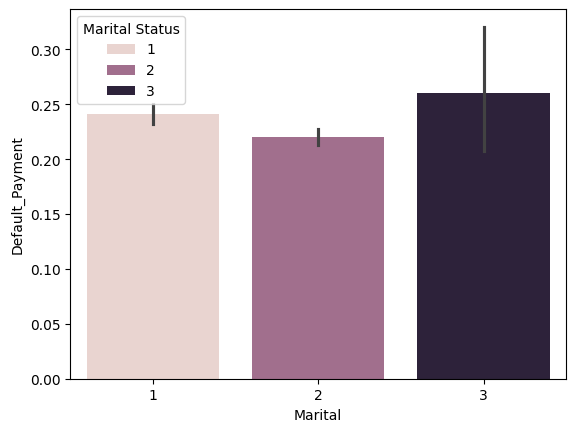

In [45]:
#  Now check the barplot
sns.barplot(x=dataset['Marital'], y=dataset['Default_Payment'], hue=dataset['Marital'])

# Adding a legend
plt.legend(title='Marital Status')

# Show the plot
plt.show()

Segregating the variables into Independent and Dependent Category

In [46]:
dataset= dataset.drop('Customer ID',axis=1)

In [47]:
X = dataset.drop("Default_Payment",axis = 1)
y = dataset["Default_Payment"]

Spliting the dataset

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

### Normalizing the Numerical Variables
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()

X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

X_train_standardized = pd.DataFrame(X_train_standardized)
X_test_standardized = pd.DataFrame(X_test_standardized)
print("Normalization Done")

X_train_standardized.head()

Normalization Done


0    1    2    3         4         5    6    7    8    9   ...  \
0  0.385965  1.0  0.0  0.0  0.512821  0.000000  0.0  0.0  0.0  0.0  ...   
1  0.456140  1.0  0.0  0.0  0.410256  0.000000  0.0  0.0  0.0  0.0  ...   
2  0.000000  1.0  0.2  0.5  0.051282  0.000000  0.0  0.0  0.0  0.0  ...   
3  0.491228  1.0  0.0  0.0  0.384615  0.166667  0.0  0.0  0.0  0.0  ...   
4  0.701754  1.0  0.2  0.5  0.384615  0.000000  0.0  0.0  0.0  0.0  ...   

         13        14        15        16        17        18        19  \
0  0.420543  0.376013  0.477837  0.489356  0.033205  0.010161  0.000000   
1  0.292315  0.535087  0.494525  0.602174  0.054226  0.021497  0.200405   
2  0.459177  0.577648  0.544786  0.547904  0.005313  0.007548  0.012794   
3  0.218847  0.279905  0.385181  0.370590  0.000000  0.000000  0.000000   
4  0.511539  0.579960  0.714891  0.603767  0.055276  0.097527  0.127942   

         20        21        22  
0  0.028200  0.030675  0.012392  
1  0.073817  0.203528  0.021204  
2  0.005640  0.004067  0.001621  
3  0.010682  0.003067  0.011554  
4  0.200420  0.204399  0.059437  

[5 rows x 23 columns]

In [49]:
X_train_standardized.columns = X_train.columns
X_test_standardized.columns = X_test.columns

Building the SVM Model

In [50]:
from sklearn.svm import SVC


In [51]:
svc_clf = SVC(kernel="linear",verbose=True)
svc_clf.fit(X_train_standardized,y_train)

[LibSVM]

SVC(kernel='linear', verbose=True)

Predicting on the test Data

In [53]:
y_test_pred = svc_clf.predict(X_test_standardized)

Evaluating the model on Validation dataset

using cross-validation to evaluate the performance of the SVM classifier

In [54]:
from sklearn.model_selection import cross_val_score

score_SVM = cross_val_score(svc_clf, X_train_standardized, y_train, cv=4)
print("Cross Validation score : " + str(score_SVM))
print("Cross Validation Mean score : " + str(score_SVM.mean()))

[LibSVM][LibSVM][LibSVM][LibSVM]Cross Validation score : [0.80185456 0.78618501 0.77959483 0.81034904]
Cross Validation Mean score : 0.7944958594969977


In [55]:
# Compute and store the accuracy of the classification model's predictions on the test dataset

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy

0.7957540263543191

Setting up the SVC with the Gaussian kernel ('rbf'):

In [56]:

svc_clf2 = SVC(kernel="rbf")
svc_clf2.fit(X_train_standardized,y_train)

score_SVM = cross_val_score(svc_clf2, X_train_standardized, y_train, cv=5)
print("Cross Validation score : " + str(score_SVM))
print("Cross Validation Mean score : " + str(score_SVM.mean()))

Cross Validation score : [0.80750458 0.79865772 0.80353874 0.79957291 0.80805615]
Cross Validation Mean score : 0.8034660192891346


In summary, this code segment explores the use of the Gaussian kernel in an SVC classifier, trains the model on standardized training data, performs cross-validation to evaluate its performance, and prints out the cross-validation scores. This process helps in assessing how well the model generalizes to unseen data and whether the Gaussian kernel improves performance compared to other kernels.

Making predictions on the test set

In [57]:
y_test_pred = svc_clf2.predict(X_test_standardized)

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy

0.8118594436310396